# Machine learning for Medicine
## Lab VI - Dimensionality Reduction: Principal Components Analysis

*Badis Jaouani - M2 Stat*
___

This lab is about projecting high dimensional data into a smaller feature space, one of the most common and efficient methods to do so is the Principal Components Analysis(PCA). The principal components are directions on which if we project the data, we will capture an amount of its variance. The more components are considered, the more variance is captured. In an ideal case, using the two or three first principal components would result in a high proportion of explained variance, around 70 to 80%.

PCA uses the either the singular values, of the eigenvalues decomposition of the data matrix $X$. In practice SVD is what is implemented since it is cheaper in terms of computational complexity.

# Table of contents
___

1. [Dimensionality Reduction on Breast Cancer and Leukemia data sets](#Import)
    - [Load data sets & preprocessing](#Import)
        - [Breast Cancer](#Import)
        - [Molecular classification of leukemia](#Import)
    - [Dimensionality reduction with non-kernelized PCA](#Import)
    - [Dimensionality reduction with kernelized PCA](#Import)
        - [Gaussian kernel](#Import)
        - [Polynomial kernel](#Import)
    - [ Dimensionality reduction with incremental PCA](#Import)
    - [Dimensionality reduction with kernelized PCA](#Import)
    
   
2. [Performance of Classification algorithms after performing PCA](#Import)
    - [How much does the number of kept components affect prediction?](#Import)
    - [Comparaison with Linear Discriminant Analysis](#Download_data)
        - [Data representation using both techniques](#Import)
        - [Prediction using LDA vs. Logistic Regression on principal components](#Import)
        

3. [Conclusion: is dimensionality Reduction really needed?](#X) 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# I. Dimensionality Reduction on Breast Cancer and Leukemia data sets
___
As usual, let us start by importing the needed data sets and doing the necessary preprocessing.

## 1) Load data sets & preprocessing
### 1.1) Breast Cancer 

In [2]:
breast_cancer = pd.read_table('data/BreastDiagnostic.txt', sep = ',', header = None)

display(HTML(
    f"Number of attributes: {breast_cancer.shape[1] - 2} <br/>"
    f"Number of patients: {breast_cancer.shape[0]} <br/>"))

In [3]:
# Fast pre processing (similar to previous labs)
from sklearn.preprocessing import minmax_scale, OrdinalEncoder

y_bc = breast_cancer.loc[:,1]
X_bc = breast_cancer.drop(columns = [0,1])
X_bc = pd.DataFrame(minmax_scale(X_bc))
enc = OrdinalEncoder()
breast_cancer.loc[:,1] = enc.fit_transform(breast_cancer.loc[:,1].to_numpy().reshape(-1,1))
y_bc = enc.fit_transform(y_bc.to_numpy().reshape(-1,1))

### 1.2) Molecular classification of leukemia

In [4]:
X_golub = pd.read_csv('data/Golub_X',sep=' ', header = None) # Observations
y_golub = pd.read_csv('data/Golub_y',sep=' ', header = None) # Classes

display(HTML(
    f"Number of attributes: {X_golub.shape[1]} <br/>"
    f"Number of individuals: {X_golub.shape[0]} <br/>"))

The number of features in the second data set is very high compared to the number of predictors in Breast Cancer Diagnosis. We can get an intuition about PCA better performing in the Breast Cancer data since it has a lower dimensionality. It is easier to explain 30 features using a two or three-dimensional representationn than to explain 3562. Let us see if this intuition has gone the right way.

## 2) Dimensionality reduction with non-kernelized PCA
This is the classic way to perform PCA, the scalar product that appears between the data points in the algorithm is not replaced with a feature map. Let us see if this method is able to separate the data.

In [5]:
from mllab import *


Packages:
	nympy as np
	matplotlib.pyplot as plt
	seaborn as sns

Functions:
	plotXY
	plot_frontiere
	map_regions
	covariance
	plot_cov
	sample_gmm
	scatter
	plot_level_set
	gaussian_sample



In [6]:
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA 

nc = 2
pca1 = PCA(n_components = nc)
X_pca_bc = pca1.fit_transform(X_bc)

pca2 = PCA(n_components = nc)
X_pca_gb = pca2.fit_transform(X_golub)

In [7]:
from sklearn.linear_model import LogisticRegression

clf1 = LogisticRegression().fit(X_pca_bc, y_bc.reshape(-1,))
clf2 = LogisticRegression().fit(X_pca_gb, y_golub.values.reshape(-1,))

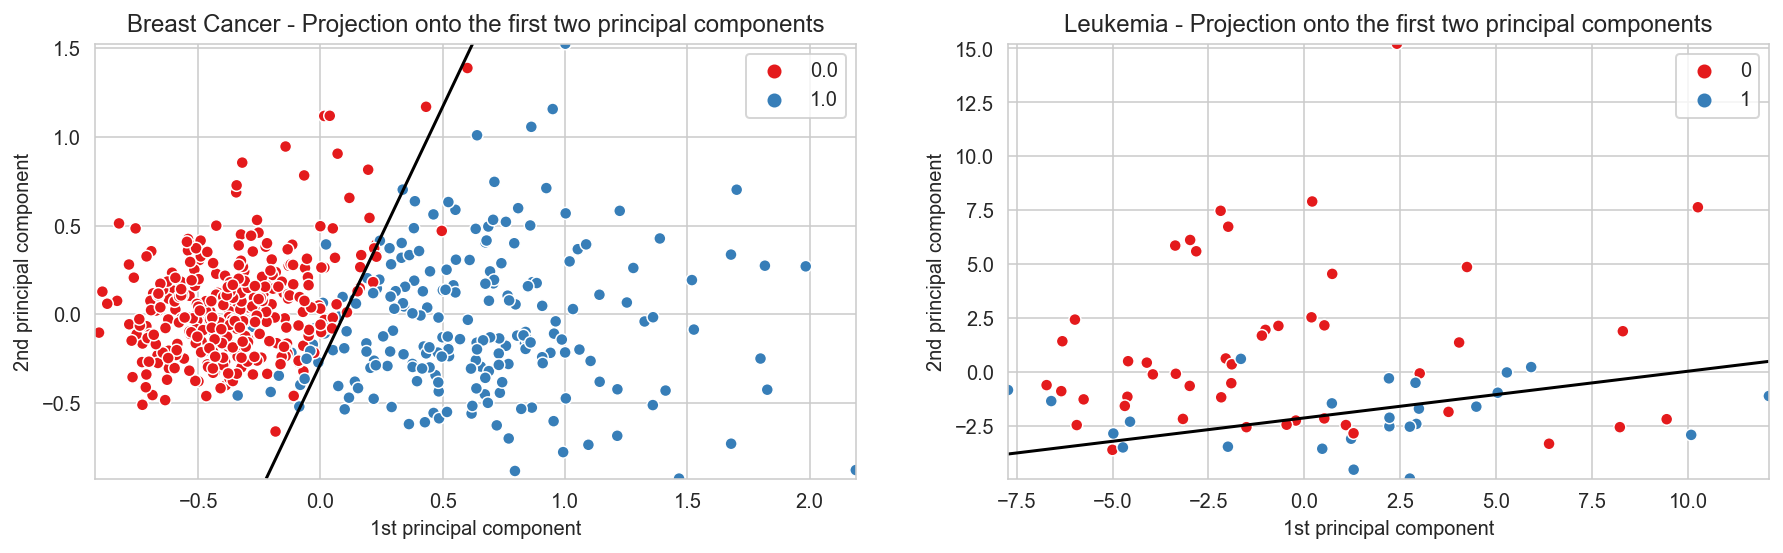

In [8]:
plt.figure(figsize = (15,4))
plt.subplot(121)
sns.scatterplot(X_pca_bc[:,0], X_pca_bc[:,1], hue = y_bc.reshape(-1), palette = 'Set1')
plot_frontiere(clf1, X_pca_bc)
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('Breast Cancer - Projection onto the first two principal components')

plt.subplot(122)
sns.scatterplot(X_pca_gb[:,0], X_pca_gb[:,1], hue = y_golub.values.reshape(-1), palette = 'Set1')
plot_frontiere(clf2, X_pca_gb)
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('Leukemia - Projection onto the first two principal components');

In the case of BC diagnosis, the points are well separated. A linear classifier would be able to predict, with high accuracy, whether the patient is diagnosed with BC or not. This is not the case of Leukemia data, where the points are not well separated, a linear classifier would result in many False Positives and False Negatives, if performed on this reduced dimension representation. Let us quantify this finding in terms of explained variance.

In [9]:
# Percentage of explained variance
display(HTML(
    f"Explained Variance (Breast Cancer): {pca1.explained_variance_ratio_*100} % <br/>"
    f"Total: {sum(pca1.explained_variance_ratio_)*100} % <br/>"
    f"Explained Variance (Leukemia): {pca2.explained_variance_ratio_*100} % <br/>"
    f"Total: {sum(pca2.explained_variance_ratio_)*100} % <br/>"
))

It becomes clear that with two principal components, the percentage of explained variance is very different between the two studied data sets. This explains the figures that we have seen above. Can we improve the results if we kernelize the algorithm? Let us find out.

## 3) Dimensionality reduction with kernelized PCA
We use two types of kernelization ie RBF and Polynomial kernels.

### 3.1) Gaussian Kernel

In [10]:
nc = 2
kpca1 = KernelPCA(n_components = nc, kernel = 'rbf')
X_kpca_bc = kpca1.fit_transform(X_bc)

kpca2 = KernelPCA(n_components = nc, kernel = 'rbf')
X_kpca_gb = kpca2.fit_transform(X_golub)

In [11]:
from sklearn import svm

clf1 = svm.SVC(kernel = 'rbf').fit(X_kpca_bc, y_bc.reshape(-1,))
clf2 = svm.SVC(kernel = 'rbf').fit(X_kpca_gb, y_golub.values.reshape(-1,))

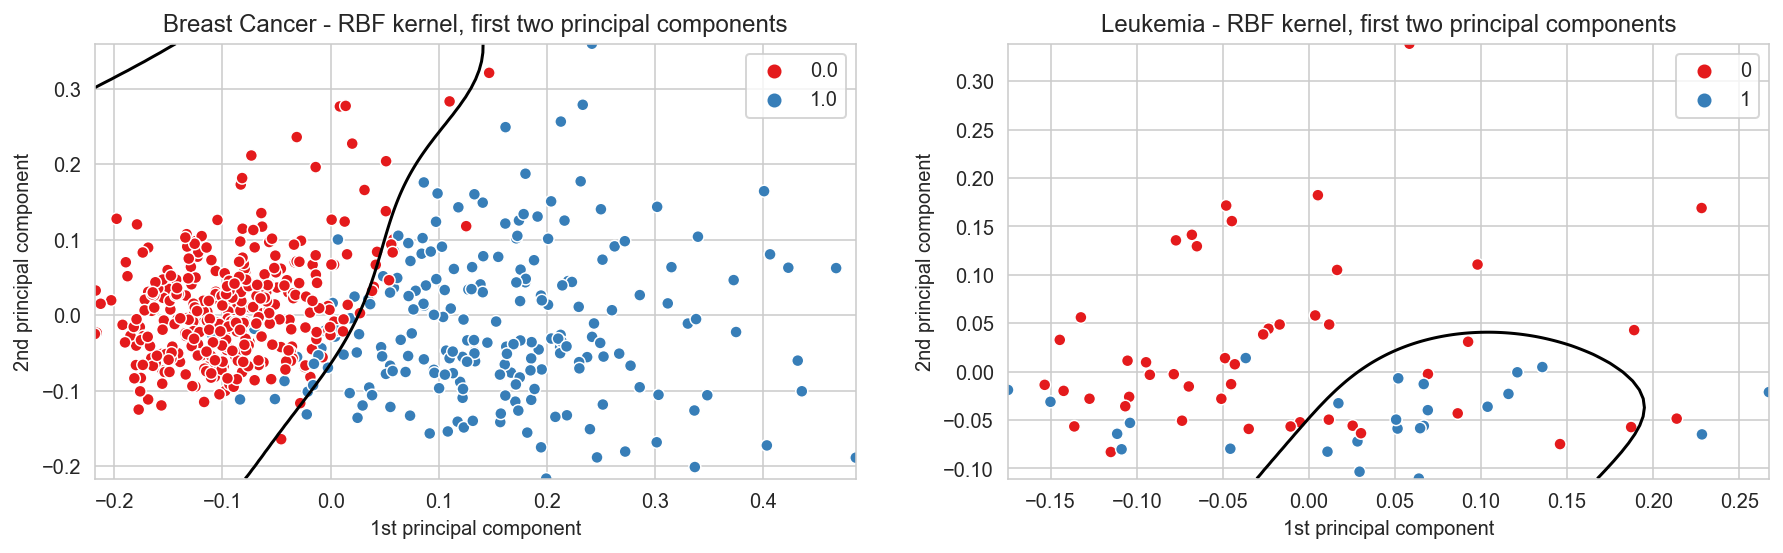

In [12]:
plt.figure(figsize = (15,4))
plt.subplot(121)
sns.scatterplot(X_kpca_bc[:,0], X_kpca_bc[:,1], hue = y_bc.reshape(-1), palette = 'Set1')
plot_frontiere(clf1, data = X_kpca_bc)
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('Breast Cancer - RBF kernel, first two principal components')

plt.subplot(122)
sns.scatterplot(X_kpca_gb[:,0], X_kpca_gb[:,1], hue = y_golub.values.reshape(-1), palette = 'Set1')
plot_frontiere(clf2, X_kpca_gb)
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('Leukemia - RBF kernel, first two principal components');

Since a kernelized version is used for PCA, we suggest the use of kernel svm for classification, the decision boundary is clearly nonlinear, but still misclasifies many points, especially in the case of leukemia.
### 3.2) Polynomial kernel

In [13]:
nc = 2
kpca1 = KernelPCA(n_components = nc, kernel = 'poly', degree = 3)
X_kpca_bc = kpca1.fit_transform(X_bc)

kpca2 = KernelPCA(n_components = nc, kernel = 'poly', degree = 3)
X_kpca_gb = kpca2.fit_transform(X_golub)

In [14]:
clf1 = svm.SVC(kernel = 'rbf').fit(X_kpca_bc, y_bc.reshape(-1,))
clf2 = svm.SVC(kernel = 'rbf').fit(X_kpca_gb, y_golub.values.reshape(-1,))

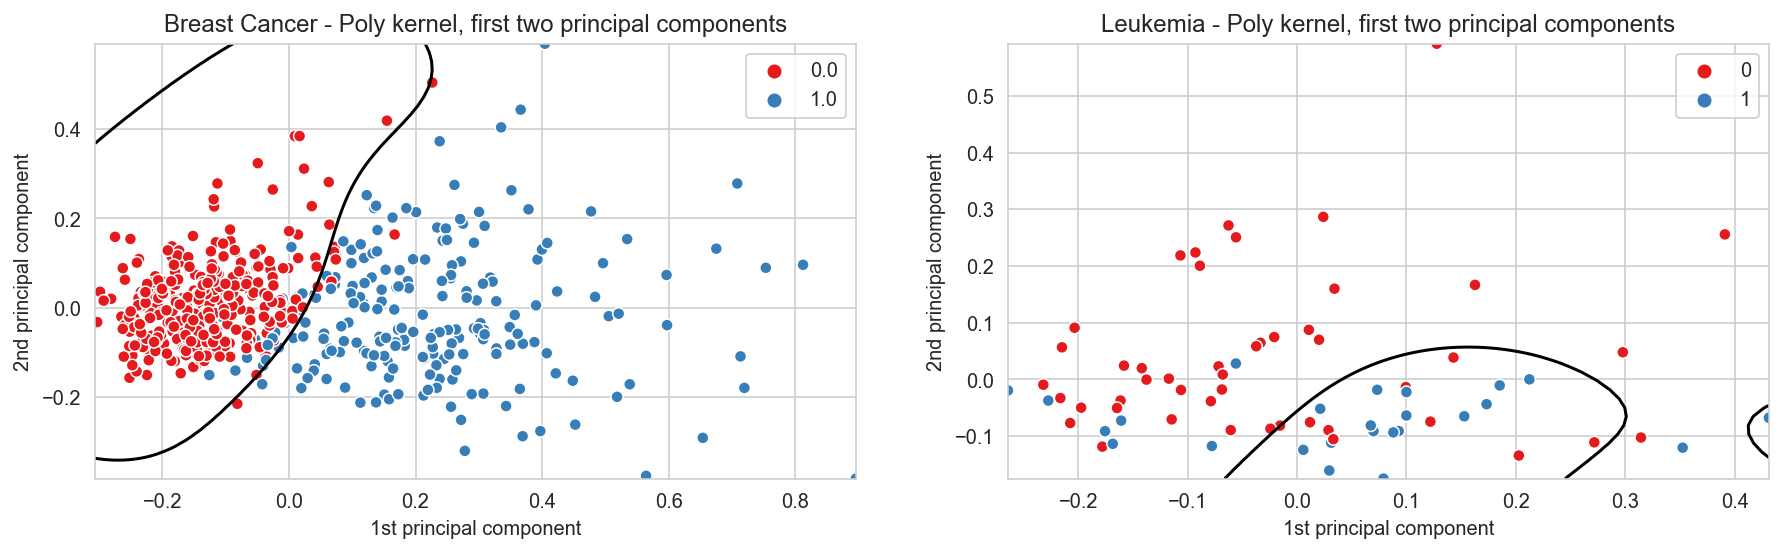

In [15]:
plt.figure(figsize = (15,4))
plt.subplot(121)
sns.scatterplot(X_kpca_bc[:,0], X_kpca_bc[:,1], hue = y_bc.reshape(-1), palette = 'Set1')
plot_frontiere(clf1, data = X_kpca_bc)
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('Breast Cancer - Poly kernel, first two principal components')

plt.subplot(122)
sns.scatterplot(X_kpca_gb[:,0], X_kpca_gb[:,1], hue = y_golub.values.reshape(-1), palette = 'Set1')
plot_frontiere(clf2, data = X_kpca_gb)
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('Leukemia - Poly kernel, first two principal components');

For both kernels, a better representation is obtained for BC Diagnosis. Kernel PCA also has to be run with more principal components if we want a good seperation of the Leukemia data points, which we will discuss in the next part.  

## 4) Dimensionality reduction with incremental PCA
Incremental PCA is very similar to the classic PCA, it is just an online version that allows updating the representation when a new data point is observed. It is very useful when dealing with data sets with a large number of observations, this is not the case here.

In [16]:
ipca1 = IncrementalPCA(n_components = nc, batch_size = 5, whiten = True)
X_ipca_bc = ipca1.fit_transform(X_bc)

ipca2 = IncrementalPCA(n_components = nc, batch_size = 5, whiten = True)
X_ipca_gb = ipca2.fit_transform(X_golub)

In [17]:
clf1 = LogisticRegression().fit(X_ipca_bc, y_bc.reshape(-1,))
clf2 = LogisticRegression().fit(X_ipca_gb, y_golub.values.reshape(-1,))

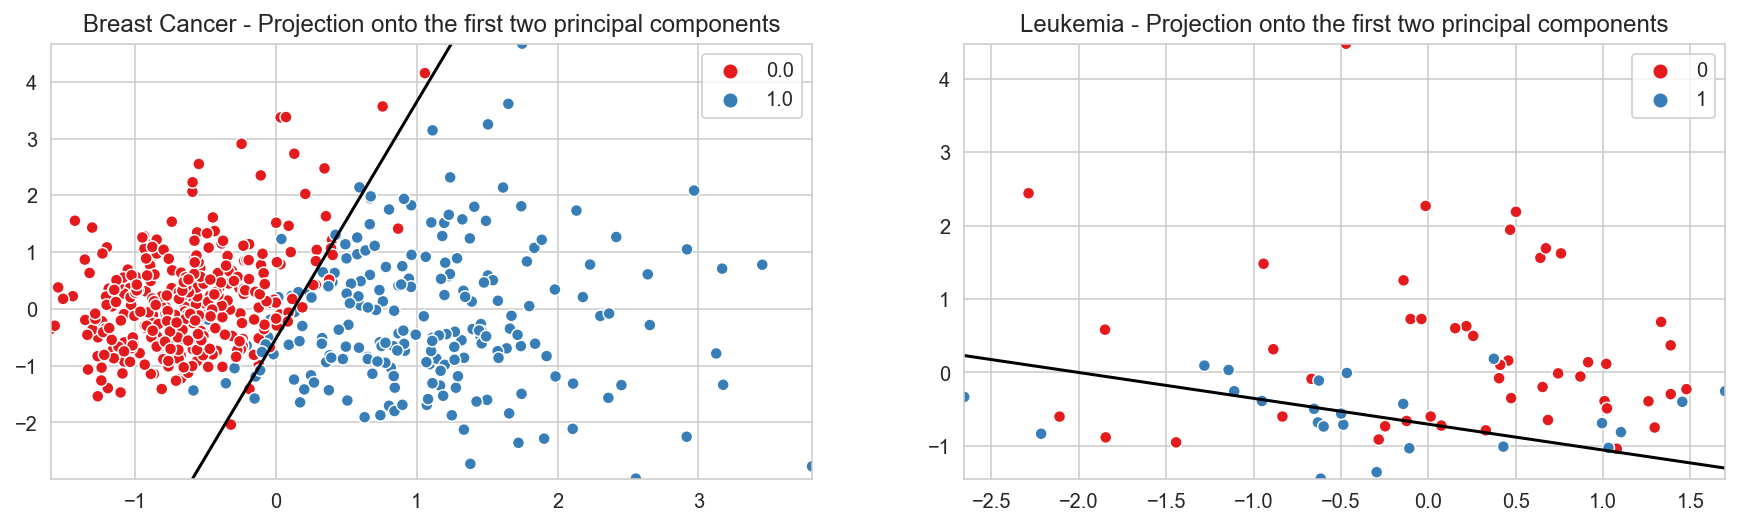

In [18]:
plt.figure(figsize = (15,4))
plt.subplot(121)
sns.scatterplot(X_ipca_bc[:,0], X_ipca_bc[:,1], hue = y_bc.reshape(-1), palette = 'Set1')
plot_frontiere(clf1, data = X_ipca_bc)
plt.title('Breast Cancer - Projection onto the first two principal components')

plt.subplot(122)
sns.scatterplot(X_ipca_gb[:,0], X_ipca_gb[:,1], hue = y_golub.values.reshape(-1), palette = 'Set1')
plot_frontiere(clf2, data = X_ipca_gb)
plt.title('Leukemia - Projection onto the first two principal components');

In [19]:
# Percentage of explained variance
display(HTML(
    f"Explained Variance (Breast Cancer): {ipca1.explained_variance_ratio_*100} % <br/>"
    f"Total: {sum(ipca1.explained_variance_ratio_)*100} % <br/>"
    f"Explained Variance (Leukemia): {ipca2.explained_variance_ratio_*100} % <br/>"
    f"Total: {sum(ipca2.explained_variance_ratio_)*100} % <br/>"
))

The results are very similar to the classic PCA and as expected, two components only capture about 25% of the variance of the data. In the next part, we run classification on the reduced representation and measure the accuracy.
# II. Performance of Classification algorithms after performing PCA
___
For the sake of simplicity, and interpretability, we will use the linear PCA. The classification will be performed by two algorithms:
- Support vector Machines with Gaussian kernel and thus a nonlinear classifier
- Logistic Regression which is a linear classifier

## 1) How much does the number of kept components affect prediction?
The code below simultaneously firstly performs dimensionality reduction with a number of components ranging between `n_min` and `n_max` where `n_max` is the total number of features of each data set, the percentage of explained variance is stored. Secondly, classification using `svm` and `LogisticRegression` is performed, and the accuracy is computed. 

In [20]:
from sklearn.model_selection import train_test_split

n_min = 2
n_max = 31
p_gb = X_golub.shape[0]
components = np.arange(n_min, p_gb, 3)

In [21]:
exp_var_bc, exp_var_gb = [], []
acc_bc_svm, acc_gb_svm = [], []
acc_bc_log, acc_gb_log = [], []

for nc in components:
    if nc < n_max:
        # Perform the dimensionality reduction
        pca1 = PCA(n_components = nc)
        X_pca_bc = pca1.fit_transform(X_bc)
        pca2 = PCA(n_components = nc)
        X_pca_gb = pca2.fit_transform(X_golub)

        # Compute precentage of explained variance
        exp_var_bc.append(sum(pca1.explained_variance_ratio_)*100)
        exp_var_gb.append(sum(pca2.explained_variance_ratio_)*100)

        # Train test split
        X_bc_tr, X_bc_tst, y_bc_tr, y_bc_tst = train_test_split(X_pca_bc, y_bc, test_size = 0.3, random_state = 4)
        X_gb_tr, X_gb_tst, y_gb_tr, y_gb_tst = train_test_split(X_pca_gb, y_golub, test_size = 0.2, random_state=4)

        # Train Supervised ML algorithms
        svm_bc = svm.SVC(kernel = 'rbf').fit(X_bc_tr, y_bc_tr.reshape(-1,))
        log_bc = LogisticRegression().fit(X_bc_tr, y_bc_tr.reshape(-1,))

        svm_gb = svm.SVC(kernel = 'rbf').fit(X_gb_tr, y_gb_tr.values.reshape(-1,))
        log_gb = LogisticRegression().fit(X_gb_tr, y_gb_tr.values.reshape(-1,))


        # Compute Accuracies
        acc_bc_svm.append(svm_bc.score(X_bc_tst, y_bc_tst))
        acc_bc_log.append(log_bc.score(X_bc_tst, y_bc_tst))

        acc_gb_svm.append(svm_gb.score(X_gb_tst, y_gb_tst))
        acc_gb_log.append(log_gb.score(X_gb_tst, y_gb_tst))
    
    else:
        pca2 = PCA(n_components = nc)
        X_pca_gb = pca2.fit_transform(X_golub)
        
        exp_var_gb.append(sum(pca2.explained_variance_ratio_)*100)
        X_gb_tr, X_gb_tst, y_gb_tr, y_gb_tst = train_test_split(X_pca_gb, y_golub, test_size = 0.2)
        
        svm_gb = svm.SVC(kernel = 'rbf').fit(X_gb_tr, y_gb_tr.values.reshape(-1,))
        log_gb = LogisticRegression().fit(X_gb_tr, y_gb_tr.values.reshape(-1,))
        
        acc_gb_svm.append(svm_gb.score(X_gb_tst, y_gb_tst))
        acc_gb_log.append(log_gb.score(X_gb_tst, y_gb_tst))

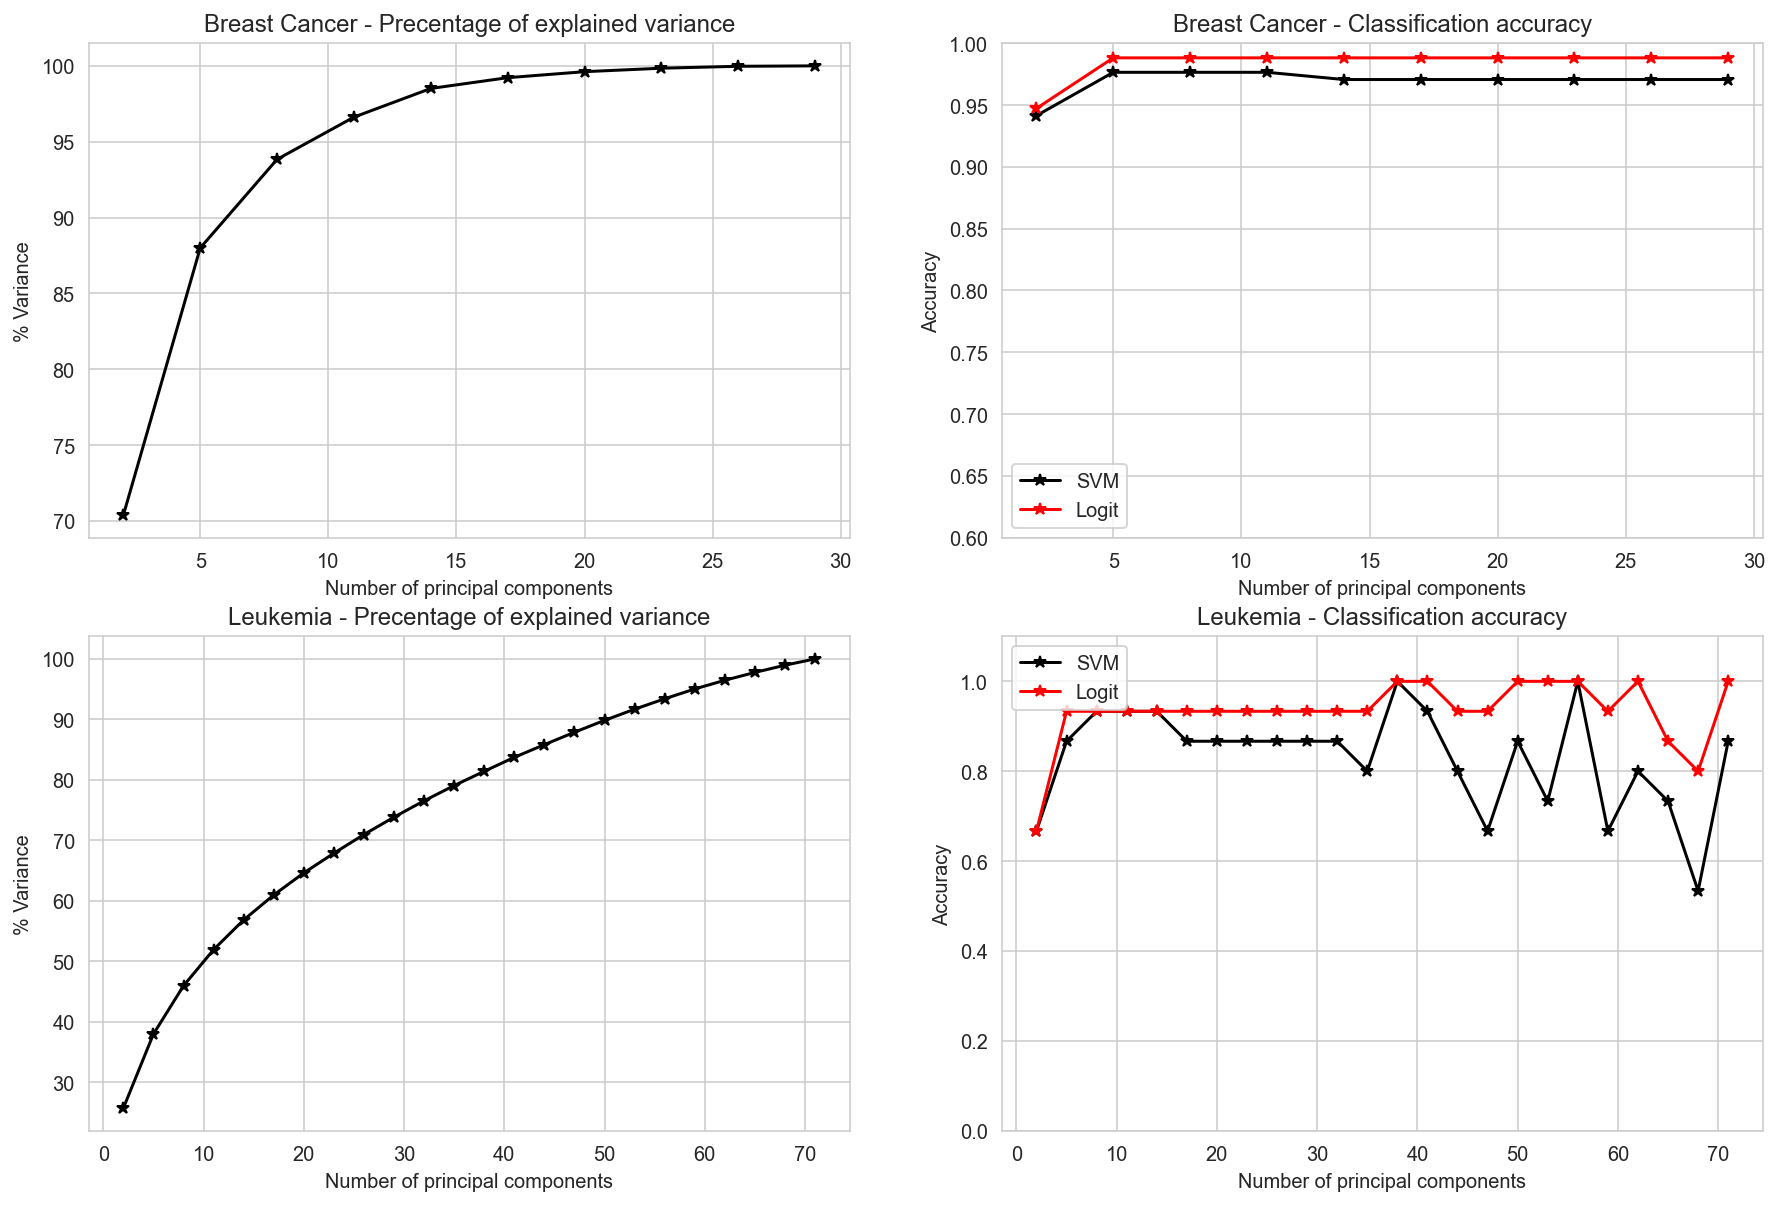

In [22]:
plt.figure(figsize = (15,10))

plt.subplot(221)
plt.plot(components[:10], exp_var_bc, '-*', color = 'black')
plt.title('Breast Cancer - Precentage of explained variance')
plt.xlabel('Number of principal components')
plt.ylabel('% Variance');

plt.subplot(222)
plt.plot(components[:10], acc_bc_svm, '-*', color = 'black', label = 'SVM')
plt.plot(components[:10], acc_bc_log, '-*', color = 'red', label = 'Logit')
plt.ylim(0.6,1)
plt.title('Breast Cancer - Classification accuracy')
plt.xlabel('Number of principal components')
plt.ylabel('Accuracy')
plt.legend();

plt.subplot(223)
plt.plot(components, exp_var_gb, '-*', color = 'black')
plt.title('Leukemia - Precentage of explained variance')
plt.xlabel('Number of principal components')
plt.ylabel('% Variance');

plt.subplot(224)
plt.plot(components, acc_gb_svm, '-*', color = 'black', label = 'SVM')
plt.plot(components, acc_gb_log, '-*', color = 'red', label = 'Logit')
plt.ylim(0,1.1)
plt.title('Leukemia - Classification accuracy')
plt.xlabel('Number of principal components')
plt.ylabel('Accuracy')
plt.legend();

**Explained Variance**: 

Observing the left figures, it is quite natural that keeping a higher number of principal components leads in capturing more variance. The curve corresponding to Leukemia data set is marked with a significant increase each time 3 new components are considered, while the curve for BC relatively stabilizes at 12 principal components and gets close to 100%. This reflects the difficulty encountered when reducing the dimensionality in the case of Molecular classification of leukemia. One caould stop at 70 or 80% of explained variance ie at a number of components between 26 and 35. 

**Classification Accuracy**:
The right curves show the accuracy of both classification algorithms. While a stable, and high accuracy is achieved for BC diagnosis, relatively severe variations are observed in case of leukemia, especially when using the kernel SVM. In addition, for the latter data set, at only two components kept, both algorithms have poor accuracy. Back to the reduced representation observed in the first part, the algorithms fail to find a decision boundary that seperates the data in an effective way. As the number of components grows, more stability is observed when using logistic regression, which achieves high extremely high accuracy.

Looking at the curve corresponding to BC diagnosis, both algorithms do very well starting from 2 or 5 principal components, suggesting the easiness of the classification task of the reduced representation of this data set, compared to leukemia's. 

In what follows, a supervised ML algorithm, Linear Discriminant Analysis, is introduced, and compared to Logistic Regression performed on principal components.

## 2) Comparaison with Linear Discriminant Analysis

### 2.1) Data representation using both techniques
We first represent the data. Only one component is allowed by LDA, while 2 principal components are used in PCA.

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA
nc = 1
lda1 = LinearDiscriminantAnalysis(n_components = nc).fit(X_bc, y_bc.reshape(-1,))
X_lda_bc = lda1.transform(X_bc)
lda2 = LinearDiscriminantAnalysis(n_components = nc).fit(X_golub, y_golub.values.reshape(-1,))
X_lda_gb = lda2.transform(X_golub)

#PCA
pca1 = PCA(n_components = 2)
X_pca_bc = pca1.fit_transform(X_bc)
pca2 = PCA(n_components = 2)
X_pca_gb = pca2.fit_transform(X_golub)

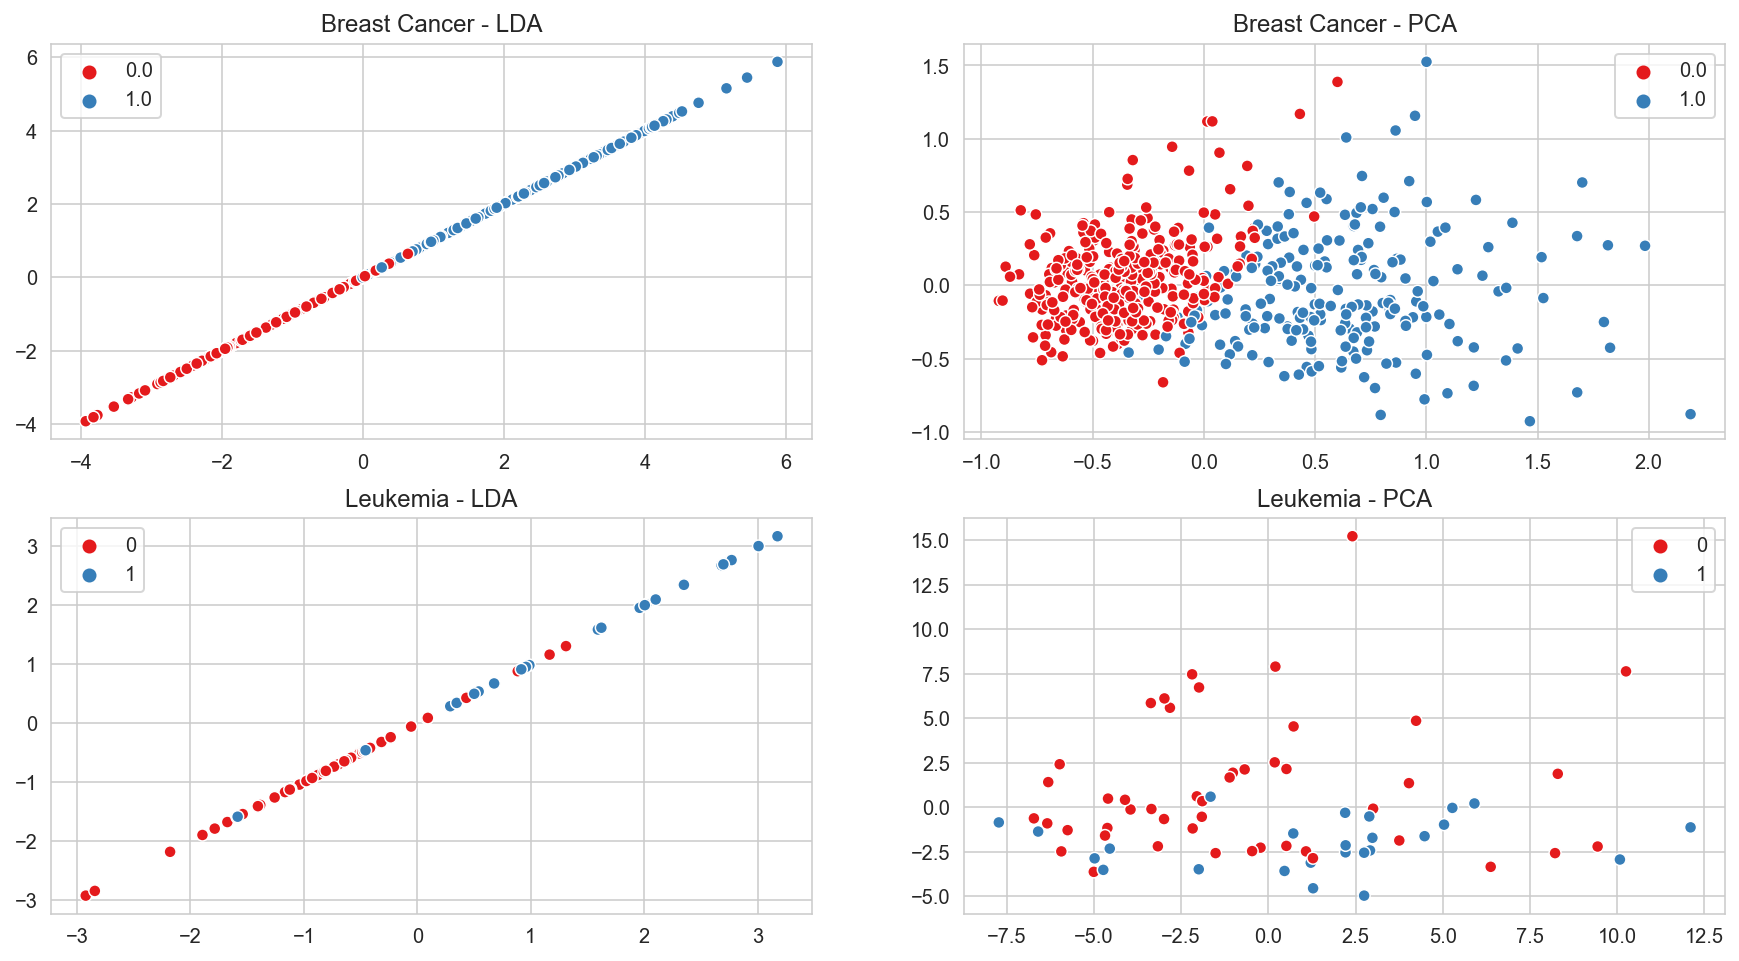

In [24]:
plt.figure(figsize = (15,8))
plt.subplot(221)
sns.scatterplot(X_lda_bc[:,0],X_lda_bc[:,0], hue = y_bc.reshape(-1,), palette = 'Set1')
plt.title('Breast Cancer - LDA');

plt.subplot(222)
sns.scatterplot(X_pca_bc[:,0],X_pca_bc[:,1], hue = y_bc.reshape(-1,), palette = 'Set1')
plt.title('Breast Cancer - PCA');

plt.subplot(223)
sns.scatterplot(X_lda_gb[:,0],X_lda_gb[:,0], hue = y_golub.values.reshape(-1,), palette = 'Set1')
plt.title('Leukemia - LDA')

plt.subplot(224)
sns.scatterplot(X_pca_gb[:,0],X_pca_gb[:,1], hue = y_golub.values.reshape(-1,), palette = 'Set1')
plt.title('Leukemia - PCA');

In [25]:
# Percentage of explained variance
display(HTML(
    f"Breast Cancer: <br/>"
    f"Explained variance (PCA): {sum(pca1.explained_variance_ratio_)*100} % <br/>"
    f"-----------<br/>"
    f"Leukemia: <br/>"
    f"Explained variance (PCA): {sum(pca2.explained_variance_ratio_)*100} % <br/>"
))

### 2.2) Prediction using LDA vs. Logistic Regression on principal components
We will now run classification. Only 5 components are kept by PCA beforme performing classification.

In [26]:
# PCA
X_pca_bc = PCA(n_components = 5).fit_transform(X_bc)
X_pca_gb = PCA(n_components = 5).fit_transform(X_golub)

# Train test split
X_bc_tr, X_bc_tst, y_bc_tr, y_bc_tst = train_test_split(X_pca_bc, y_bc, test_size = 0.3, random_state = 4)
X_gb_tr, X_gb_tst, y_gb_tr, y_gb_tst = train_test_split(X_pca_gb, y_golub, test_size = 0.2, random_state = 4)

# Fit Classifiers
log_bc = LogisticRegression().fit(X_bc_tr, y_bc_tr.reshape(-1,))
log_gb = LogisticRegression().fit(X_gb_tr, y_gb_tr.values.reshape(-1,))

lda_bc = LinearDiscriminantAnalysis(n_components = 1).fit(X_bc_tr, y_bc_tr.reshape(-1,))
lda_gb = LinearDiscriminantAnalysis(n_components = 1).fit(X_gb_tr, y_gb_tr.values.reshape(-1,))

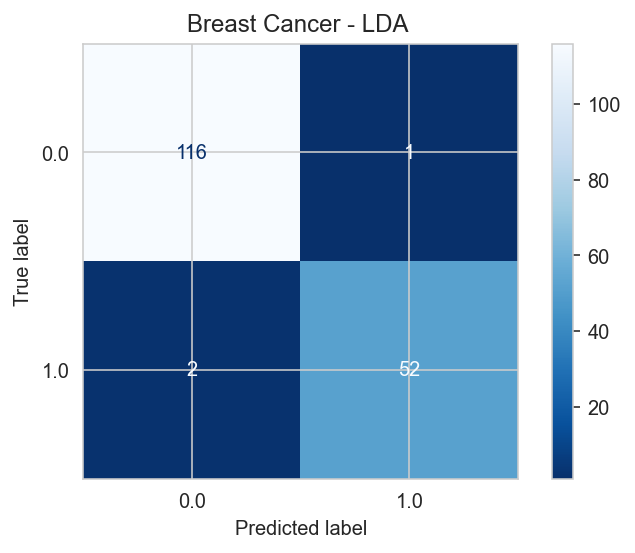

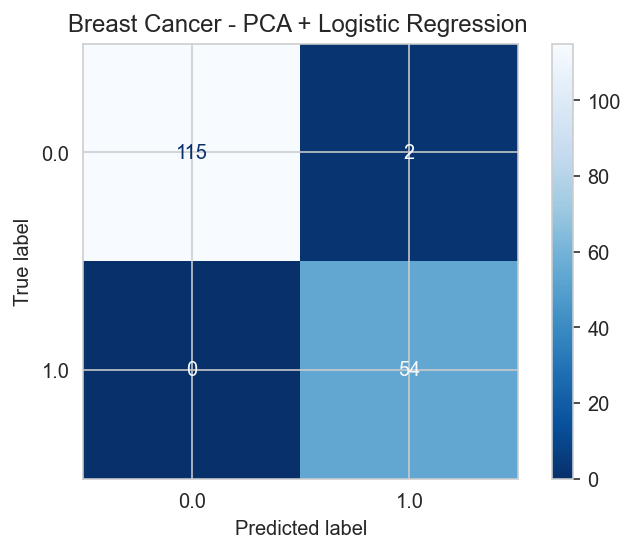

In [27]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lda_bc, X_bc_tst, y_bc_tst, cmap = 'Blues_r')
plt.title('Breast Cancer - LDA ')

display(HTML(
    f"Breast Cancer<br/>"
    f"Accuracy LDA: {lda_bc.score(X_bc_tst,y_bc_tst)} % <br/>"
    f"Accuracy Logit: {log_bc.score(X_bc_tst,y_bc_tst)} % <br/>"
))

plot_confusion_matrix(log_bc, X_bc_tst, y_bc_tst, cmap = 'Blues_r')
plt.title('Breast Cancer - PCA + Logistic Regression ');

Very high accuracies are achieved by both LDA and PCA + Logistic Regression for BC diagnosis. This data set seems to be very easy for predictions. For LDA to do well, the data has to be well separated and the clusters approximatively Gaussian, which seems to be the case regarding the heigh performance of LDA in this case. What is also interesting is that keeping 5 principal components allows Logistic Regression to be extremely accurate. Let us compare both algorithms on the 'harder' data set.

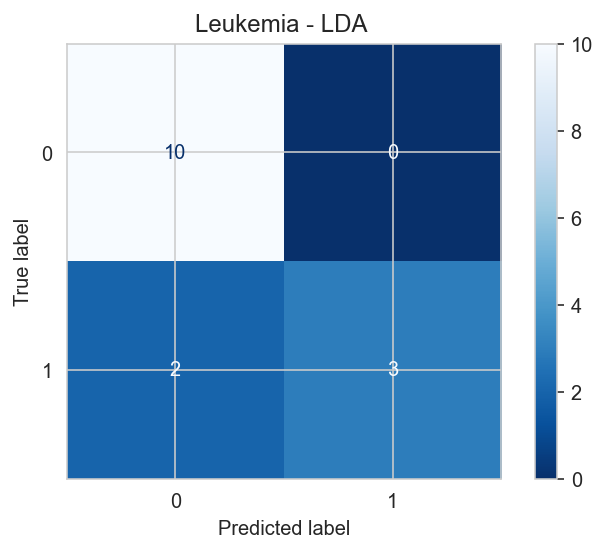

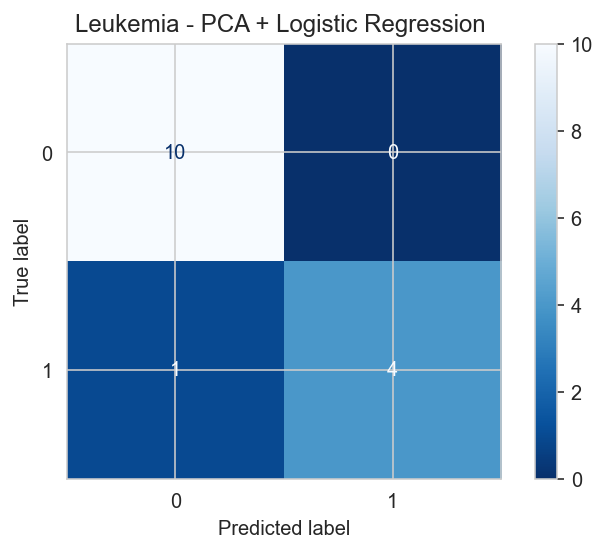

In [28]:
display(HTML(
    f"Leukemia <br/>"
    f"Accuracy LDA: {lda_gb.score(X_gb_tst,y_gb_tst)} % <br/>"
    f"Accuracy Logit: {log_gb.score(X_gb_tst,y_gb_tst)} % <br/>"
))

plot_confusion_matrix(lda_gb, X_gb_tst, y_gb_tst, cmap = 'Blues_r')
plt.title('Leukemia - LDA ')

plot_confusion_matrix(log_gb, X_gb_tst, y_gb_tst, cmap = 'Blues_r')
plt.title('Leukemia - PCA + Logistic Regression ');

As the confusion matrices suggest, LDA leads to 1 more False Negative than PCA + Logit, but in general, both algorithms are very effective, but since Logistic Regression makes no assumption on the data, but only on the shape of the decision function, it is more suitable to use it.

# Conclusion: is dimensionality Reduction really needed?
___


In the case of data sets with small number of features, supervised machine learning does not need to reduce the dimension although similar performance is achieved with a reduced representations of the data. We have seen it from the BC diagnosis where a very high accuracy is obtained with or without reducing the dimension. 

PCA becomes important, and sometimes a must, when dealing data with much higher dimension (leukemia). Although it is difficult to have a good reduced representation with small number of components, it can be very useful to consider a higher number of principal components, that allows supervised ML algorithms to perform well. 

A personal point of view will conclude this lab, since we are interested in reducing the dimension, it could better, and more interpretable, to perform feature selection since it directly targets the most discriminative features while PCA uses the singular or eigen value decomposition, which is less expressive in practice.